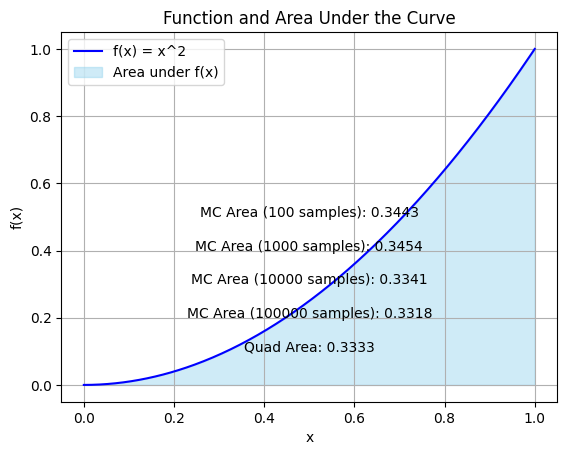

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def monte_carlo_integration(func, a, b, num_samples):
    samples = np.random.uniform(a, b, num_samples)
    func_values = func(samples)
    average_value = np.mean(func_values)
    integral_estimate = (b - a) * average_value
    return integral_estimate

def f(x):
    return x**2

def plot_integration_results(func, a, b, sample_sizes):
    # Numerical quadrature integration
    quad_result, _ = quad(func, a, b)

    # Plot the function
    x = np.linspace(a - a/4, b + a/4, 400)
    y = func(x)

    plt.plot(x, y, 'b', label='f(x) = x^2')

    # Fill the area under the curve for the integration limits
    x_fill = np.linspace(a, b, 400)
    y_fill = func(x_fill)
    plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.4, label='Area under f(x)')

    # Add text annotations for the computed areas with different sample sizes
    for i, num_samples in enumerate(sample_sizes):
        mc_result = monte_carlo_integration(func, a, b, num_samples)
        plt.text(0.5 * (a + b), 0.5 * max(y_fill) - i * 0.1 * max(y_fill), 
                 f'MC Area ({num_samples} samples): {mc_result:.4f}', horizontalalignment='center')

    # Add text annotation for the quadrature result
    plt.text(0.5 * (a + b), 0.1 * max(y_fill), f'Quad Area: {quad_result:.4f}', horizontalalignment='center')

    plt.title('Function and Area Under the Curve')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
a = 0
b = 1
sample_sizes = [100, 1000, 10000, 100000]

plot_integration_results(f, a, b, sample_sizes)

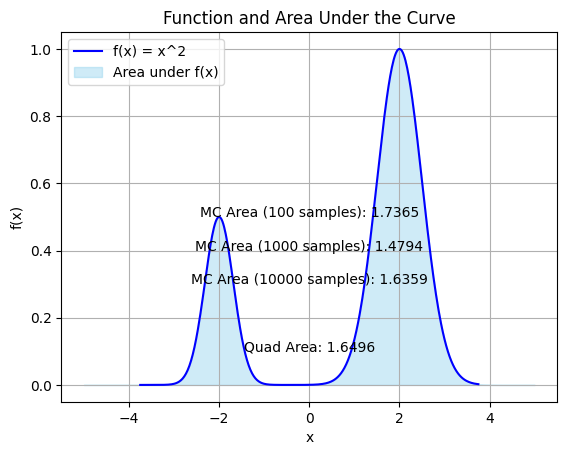

In [5]:
def f2(x):
    return np.exp(-((x - 2)**2) / 0.5) + 0.5 * np.exp(-((x + 2)**2) / 0.2)

plot_integration_results(f2, -5,5, [100,1000,10000])

In [6]:
import numpy as np
from prettytable import PrettyTable
from scipy.integrate import quad

def monte_carlo_integration_withstd(func, a, b, num_samples):
    samples = np.random.uniform(a, b, num_samples)
    func_values = func(samples)
    average_value = np.mean(func_values)
    integral_estimate = (b - a) * average_value
    return integral_estimate, np.std(func_values) * (b - a) / np.sqrt(num_samples)

def f(x):
    return x**2

def display_integration_results(func, a, b, sample_sizes):
    # Numerical quadrature integration
    quad_result, _ = quad(func, a, b)

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Sample Size", "Integration Result (mean ± std.dev)"]

    # Compute and add results for different sample sizes
    for num_samples in sample_sizes:
        mc_mean, mc_std = monte_carlo_integration_withstd(func, a, b, num_samples)
        table.add_row([num_samples, f"{mc_mean:.4f} ± {mc_std:.4f}"])

    # Add the quadrature result to the table
    table.add_row(["Scipy Quad", f"{quad_result:.4f} ± 0.0000"])

    # Print the table
    print(table)

# Example usage
a = 0
b = 1
sample_sizes = [100, 1000, 10000, 100000]

display_integration_results(f, a, b, sample_sizes)

+-------------+-------------------------------------+
| Sample Size | Integration Result (mean ± std.dev) |
+-------------+-------------------------------------+
|     100     |           0.2717 ± 0.0254           |
|     1000    |           0.3473 ± 0.0095           |
|    10000    |           0.3303 ± 0.0030           |
|    100000   |           0.3334 ± 0.0009           |
|  Scipy Quad |           0.3333 ± 0.0000           |
+-------------+-------------------------------------+


+-------------+-------------------------------------+
| Sample Size | Integration Result (mean ± std.dev) |
+-------------+-------------------------------------+
|     100     |           0.6770 ± 0.0430           |
|     1000    |           0.6859 ± 0.0130           |
|    10000    |           0.6643 ± 0.0042           |
|    100000   |           0.6655 ± 0.0013           |
|  Scipy Quad |           0.6667 ± 0.0000           |
+-------------+-------------------------------------+


/var/folders/85/sk2txhy548n9ldzmhd3xrzww0000gn/T/ipykernel_30772/879089765.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


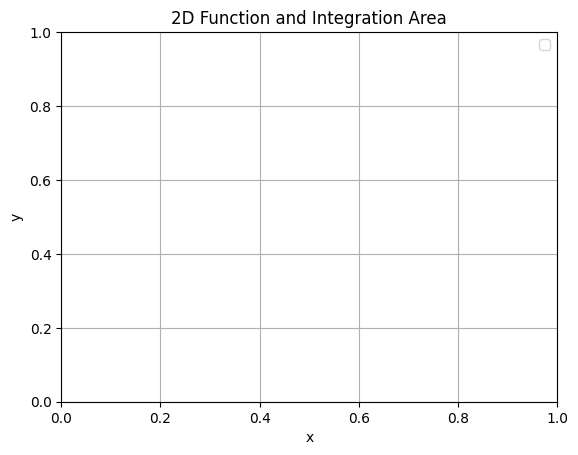

NameError: name 'X' is not defined

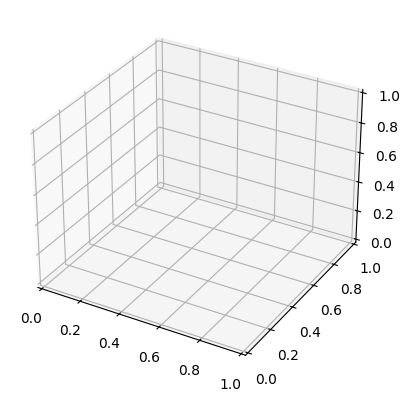

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from scipy.integrate import dblquad

def monte_carlo_integration_2d(func, ax, bx, ay, by, num_samples):
    x_samples = np.random.uniform(ax, bx, num_samples)
    y_samples = np.random.uniform(ay, by, num_samples)
    func_values = func(x_samples, y_samples)
    average_value = np.mean(func_values)
    integral_estimate = (bx - ax) * (by - ay) * average_value
    return integral_estimate, np.std(func_values) * (bx - ax) * (by - ay) / np.sqrt(num_samples)

def f(x, y):
    return x**2 + y**2

def plot_integration_results_2d(func, ax, bx, ay, by, sample_sizes):
    # Numerical quadrature integration
    quad_result, _ = dblquad(func, ax, bx, lambda x: ay, lambda x: by)

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Sample Size", "Integration Result (mean ± std.dev)"]

    # Compute and add results for different sample sizes
    for num_samples in sample_sizes:
        mc_mean, mc_std = monte_carlo_integration_2d(func, ax, bx, ay, by, num_samples)
        table.add_row([num_samples, f"{mc_mean:.4f} ± {mc_std:.4f}"])

    # Add the quadrature result to the table
    table.add_row(["Scipy Quad", f"{quad_result:.4f} ± 0.0000"])

    # Print the table
    print(table)

    # # Plot the function in 2D
    # x = np.linspace(ax - 0.5, bx + 0.5, 400)
    # y = np.linspace(ay - 0.5, by + 0.5, 400)
    # X, Y = np.meshgrid(x, y)
    # Z = func(X, Y)

    # plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    # plt.colorbar(label='f(x, y)')

    # # Highlight the integration area
    # plt.fill_between([ax, bx], ay, by, color='skyblue', alpha=0.4, label='Integration Area')

    plt.title('2D Function and Integration Area')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the function in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('3D Plot of the Function')

    # Highlight the integration area in 3D
    x_fill = np.linspace(ax, bx, 100)
    y_fill = np.linspace(ay, by, 100)
    X_fill, Y_fill = np.meshgrid(x_fill, y_fill)
    Z_fill = func(X_fill, Y_fill)
    ax.plot_surface(X_fill, Y_fill, Z_fill, color='skyblue', alpha=0.4)

    plt.show()

# Example usage
ax = 0
bx = 1
ay = 0
by = 1
sample_sizes = [100, 1000, 10000, 100000]

plot_integration_results_2d(f, ax, bx, ay, by, sample_sizes)